# Dumped pendolum

$$ \frac{d^2 \theta}{dt^2} + \frac{b}{m} \frac{d\theta}{dt} + \frac{g}{l} \sin\theta = 0 $$

* $m$ = mass at the end of pendolum
* $l$ = pendolum lenght
* $b$ = dumping coefficient
* $g$ = gravity acceleration = 9.81 $m/s^2$

Splitting differential equation in two equations of motions ($\theta$ = angle, $\dot{\theta}$ = angular speed):

$$ \left\{\begin{eqnarray}
\frac{d\theta}{dt} & = & \dot{\theta} \\
\frac{d\dot{\theta}}{dt} & = & - \frac{b}{m} \dot{\theta} - \frac{g}{l} \sin\theta = 0 \\
\end{eqnarray} \right.$$

In [3]:
import numpy as np

# theta = [ angle, angular speed ]
def dumped_pendulum_ode(theta,t,b=0.5,g=9.81,l=1.,m=1.):
    return [ theta[1], -(b/m)*theta[1]-(g/l)*np.sin(theta[0]) ]

In [4]:
from scipy.integrate import odeint

b = 0.5
g = 9.81
l = 1.
m = 1.

t = np.linspace(0,20,200)

# initial conditions
theta0 = [1,0] # start from misplaced pendolum, with 0 initial speed

# solve differential equations
theta = odeint(dumped_pendulum_ode,theta0,t,args=(b,g,l,m)) 

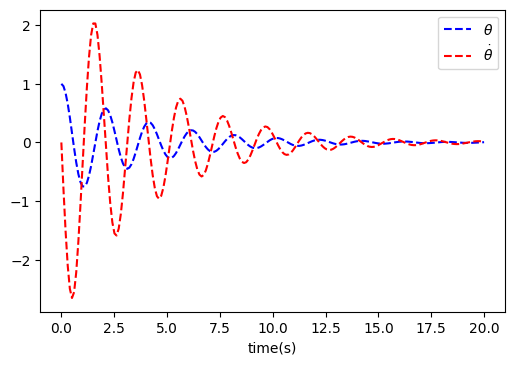

In [5]:
import matplotlib.pyplot as plt

plt.figure(dpi=100)
plt.plot(t,theta[:,0],'b--',label=r'$\theta$')
plt.plot(t,theta[:,1],'r--',label=r'$\dot{\theta}$')
plt.xlabel('time(s)')
plt.ylabel('')
plt.legend(loc='best')
plt.show()

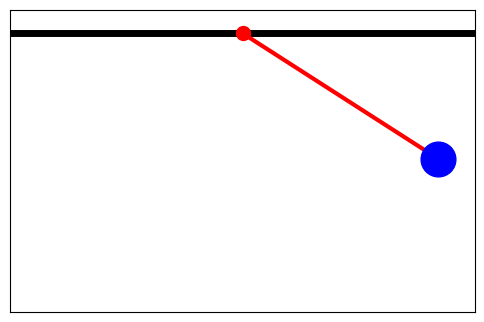

In [6]:
# plot one time snapshot

i = 0

x0 = 0
y0 = 0
x1 = l*np.sin(theta[i][0])
y1 = -l*np.cos(theta[i][0])

plt.figure(dpi=100)
plt.plot([-1.,1.],[0,0],'black',linewidth=5)
plt.plot([x0,x1],[y0,y1],"-",linewidth=3,color='red') 
plt.plot(x0,y0,'o',markersize=10,color="red")
plt.plot(x1,y1,'o',markersize=25,color='blue')
plt.xlim([-1.0,1.0])
plt.ylim([-1.2,0.1])
plt.tick_params(left=False,
                bottom=False,
                labelleft=False,
                labelbottom=False)

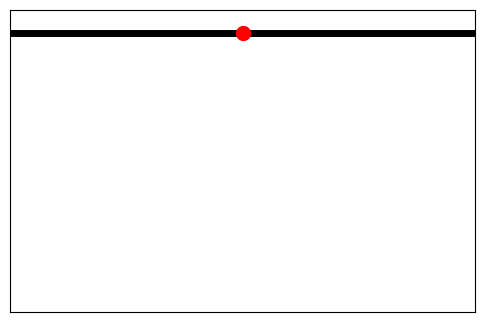

In [7]:
fig, ax = plt.subplots(dpi=100)
plt.plot([-1.,1.],[0,0],'black',linewidth=5)
plt.plot(x0,y0,'o',markersize=10,color="red")
line, = plt.plot([],[],'-',linewidth=3,color='red')
ball, = plt.plot([],[],'o',markersize=25,color='blue')
plt.xlim([-1.0,1.0])
plt.ylim([-1.2,0.1])
plt.tick_params(left=False,
                bottom=False,
                labelleft=False,
                labelbottom=False)

In [8]:
from matplotlib.animation import FuncAnimation
%matplotlib inline
from IPython.display import HTML, Image

def pendolum_init():
    line.set_data([], [])
    return (line,)

def pendolum_animate(i):
    x0 = 0
    y0 = 0
    x1 = l*np.sin(theta[i][0])
    y1 = -l*np.cos(theta[i][0])
    ball.set_data([x1],[y1])
    line.set_data([x0,x1],[y0,y1])
    return (line,)

anim = FuncAnimation(fig,pendolum_animate,frames=range(len(theta)),init_func=pendolum_init,blit=True)

HTML(anim.to_html5_video())

In [9]:
anim.save('gifs/pendolum_dumped.gif', writer='imagemagick', fps=30)

In [10]:
Image(url='gifs/pendolum_dumped.gif')